# Phase Field Simulations
## 1. Landau-Ginzburg Free Energy Functional
In this notebook, we will solve the two evolution equations central to all phase-field models: the Allen-Cahn and Cahn-Hilliard equations. These equations describe the time evolution of an order parameter $\phi(\textbf{x})$. We begin by defining a total free-energy functional of the order parameter $\phi$ using Landau theory

$$F_T = \int_{V}d^3\textbf{x}\left[f(\phi) + L\nabla \phi+ K|\nabla\phi|^2 + M\nabla^2\phi +\ldots\right]$$

The parameters $L$, $K$, $M$, etc. are constants. The free energy density as a function of the order parameter $f(\phi)$ is associated with the Landau double-well free energy resulting from a Taylor expansion about the critical point $(T_c,\phi_*)$ 

$$f(\phi) = \phi_* + \dfrac{r}{2}(\phi-\phi_*)^2 + \dfrac{u}{4!}(\phi-\phi_*)^4 + \ldots$$

where $r = r_0\frac{T-T_c}{T_c}$ and $u$ is independent of $T$. In the ordered (disordered) phase, $r < 0$ $(r > 0)$ and $u > 0$ always. Note that if $\phi_* \neq 0$, the free energy density will generally retain cubic terms (indeed, when $\phi$ describes alloy concentration, $\phi_* = 0.5$). The required terms can be reduced by considering system symmetry. All  systems with inversion symmetry must be invariant under $x\rightarrow-x$, therefore $L = 0$ (along with all other odd power terms). For the effective low energy (low momentum) theory, the functional is truncated at first-order (setting $M$ and all other higher-power terms to 0), resulting in the well-known Cahn-Hilliard free energy functional:

$$F_T = \int_{V}d^3\textbf{x}\left(f(\phi(\textbf{x})) + \kappa|\nabla \phi|^2\right)$$

The parameter $\kappa$ is known as the gradient energy coefficient and represents the cost associated with creating a non-uniform composition profile, such as those present at interfaces. The condition of equilibrium is found by minimizing the free energy using a variational derivative: 

$$\int_{V}d^3\textbf{x}\frac{\delta F_T}{\delta \phi} w := \left[ \dfrac{\partial}{\partial \alpha}\left( F_T(\phi + \alpha w) \right) \right]_{\alpha=0}$$ $$= \left[\int_{V}\dfrac{\partial f}{\partial (\phi+\alpha w)}w + \dfrac{\partial}{\partial\alpha}\left(\kappa(\nabla^2\phi + 2\alpha\nabla\phi\cdot\nabla w + \alpha^2\nabla^2w)\right)\right]_{\alpha =0}=\int_{V}d^3\textbf{x}\left( \dfrac{\partial f}{\partial \phi}w + 2\kappa\nabla\phi\cdot\nabla w\right)$$

In order to access the variational derivative, we must use integration by parts on  $2\kappa\nabla\phi\cdot\nabla w$ term to move the $\nabla$ off $w$ and onto $\phi$ (assuming the boundary term vanishes):

$$\int_{V}d^3\textbf{x}\left( \dfrac{\partial f}{\partial \phi}w + 2\kappa\nabla\phi\cdot\nabla w\right) = \int_{V}d^3\textbf{x}\left( \dfrac{\partial f}{\partial \phi} - 2\kappa\nabla^2\phi\right)w$$

Therefore, we obtain the following Euler-Lagrange equation for the variational derivative:

$$\dfrac{\delta F_T}{\delta \phi} = \dfrac{\partial f}{\partial \phi} - 2\kappa \nabla^2 \phi = 0$$

Before deriving the equations, let us consider two different types of order parameters: conserved and non-conserved. A non-conserved order parameter refers to one for which the net quantity of $\phi$ distributed within each phase need not be fixed - common examples would be sublattice long-range ordering or ferromagnetic spins. On the other hand, a conserved order parameter - the most common one being element concentration - has the additional constraint that the number of particles put into the system is fixed (equivalently, the initial alloy composition is fixed). To incorporate fixed particle number for a conserved order parameter, we need to re-do the variational derivative using a Lagrange multiplier to apply the constraint $\phi - \phi_0 = 0$ where $\phi_0$ represents the alloy composition:

$$F_T = \int_{V} d^3\textbf{x} \left( f(\phi(\textbf{x})) + \kappa |\nabla \phi|\right) - \lambda(\phi - \phi_0)$$
This time, the variational derivative picks up an additional term:
$$\dfrac{\delta F_T}{\delta \phi} =\dfrac{\partial f}{\partial \phi} - 2\kappa \nabla^2 \phi - \lambda = 0$$
$$\lambda = \dfrac{\partial f}{\partial \phi} - 2\kappa \nabla^2 \phi$$

$\lambda$ is an effective chemical potential for the alloy system. 

## 2. Kinetic Evolution by Diffusion
For composition, we know that the dynamical evolution equation are given by Fick's laws (in the marker reference frame):

$$\textbf{J}_i = -M_i\nabla\mu_i\qquad\qquad \nabla \cdot \textbf{J}_i = \dfrac{\partial c_i}{\partial t}$$

where $M$ is the atomic mobility coefficient. Each component in the alloy has its own mobility $M_i > 0$. For a binary alloy, there exist two mobilities $M_A$ and $M_B$ which together define the interdiffusion coefficient (using the center of mass reference frame):

$$D = c_A c_B(M_AX_A + M_B X_B)\dfrac{\partial ^2 G}{\partial X_A ^2}$$ 

For a pure single phase undergoing phase separation, this simplifies to $M = D\left(\dfrac{\partial^2G}{\partial X_A^2}\right)^{-1}_{X_A = 0}$. Using the center of mass frame, we can write a single diffusion equation that describes the combined diffusion of both A and B via the derivative of the order parameter:

$$\textbf{J}_A^{V} = -\textbf{J}_B^{V} = -M\nabla\lambda\qquad\qquad \nabla \cdot \textbf{J}_A^{V} = \nabla \cdot -\textbf{J}_B^{V} = \dfrac{\partial \phi}{\partial t}$$

For a conserved order parameter (like concentration), the kinetic evolution is governed by the continuity equation $\nabla \cdot \textbf{J} = \frac{\partial \phi}{\partial t}$

$$\boxed{\dfrac{\partial \phi}{\partial t} = M\nabla^2\lambda = M\nabla^2\left(\dfrac{\partial f}{\partial \phi} - 2\kappa \nabla^2 \phi\right)}$$

This is the Cahn-Hilliard equation. For a non-conserved order parameter, dynamical evolution equations can be found by simply using the variational derivative (without the composition constraint):

$$\boxed{\dfrac{\partial \phi}{\partial t} = -M\dfrac{\delta F_T}{\delta \phi} = -M\left(\dfrac{\partial f}{\partial \phi} - 2\kappa \nabla^2 \phi\right)}$$

This is the Allen-Cahn equation. These equations are non-linear (because of $f(\phi)$) PDEs for the evolution of the order parameter $\phi$. They must be solved numerically. 

## 3. Parameterizing the model: free energy, interfacial energy, and derived quantities
In almost all phase-field models, the free energy function $f(\phi)$ is taken to be a double-well free energy with minima at $\phi = 0,1$ so that we can continuously transform from one phase to the other. For the following models, we will use the simple form 

$$f(\phi) = W\phi^2(1-\phi)^2$$

where $W$ is a parameter controlling the barrier height. While this free energy is convenient, its relationship to the formal Landau theory of phase transitions should be made clear. If $\phi_* = 0.5$, the Landau expansion for free energy density reads

$$f(\phi) = \dfrac{1}{2} + \dfrac{r}{2}\left(\phi-\dfrac{1}{2}\right)^2 + \dfrac{u}{4!}\left(\phi-\dfrac{1}{2}\right)^4 = \dfrac{1}{2} + \dfrac{r}{2}\left(\phi^2 - \phi + \dfrac{1}{4}\right) + \dfrac{u}{24}\left(\phi^4 - 2\phi^3 - \dfrac{1}{2}\phi + \dfrac{3}{2}\phi^2 + \dfrac{1}{16}\right)$$

When compared to the double-well free energy $W(\phi^4 + \phi^2 - 2\phi^3)$, we must choose $r$ and $u$ such that the linear and constant terms vanish. This is accomplished by solving

$$\begin{bmatrix}\frac{1}{2} & \frac{1}{48} \\ \frac{1}{8} & \frac{1}{384} \end{bmatrix} \begin{bmatrix} r \\ u\end{bmatrix} = \begin{bmatrix} 0 \\ -\frac{1}{2} \end{bmatrix} \Rightarrow \begin{bmatrix} r \\ u\end{bmatrix} = \begin{bmatrix} -8 \\ 192 \end{bmatrix} $$

Hence, if $u = -24r \equiv W$, the Landau expansion becomes $W\phi^2(1-\phi)^2$. Note that by fixing $r$, we are setting the distance to the critical temperature $|T-T_c|$, therefore, simulations at different $T$ are captured by changing the barrier height $W$ accordingly by $W\sim W_0|T-T_c|$. Being further from $T_c$ implies a larger $W$, correctly decreasing the probability of a jump from one phase to the other. With this free energy density, the gradient is easily calculated by hand as 

$$\dfrac{\partial f}{\partial \phi} = W(2\phi - 6\phi^2+4\phi^3)$$

The spinoidal points define the limit of stability determined by

$$\dfrac{\partial^2 f}{\partial \phi^2} = W(2 - 12\phi + 12\phi^2) = 0 \Rightarrow \phi^{*} = \dfrac{1}{2}\pm \sqrt{\dfrac{1}{12}}$$
The phase-field model parameters that control the physics of the system are the barrier height $W$ and gradient energy coefficient $\kappa$. These parameters can be related to experimental parameters that characterize the interface - the interfacial thickness $\delta$ and the interfacial energy $\sigma$ - by the following relations:
$$\sigma = \dfrac{\sqrt{W\kappa}}{3}$$

$$\delta = \sqrt{\dfrac{\kappa}{W}}$$

To derive the above relations, we will integrate the Euler-Lagrange equations:

$$\int_{V} d\phi\left( \dfrac{\partial f}{\partial \phi} - 2\kappa\nabla^2\phi\right) = A_0\Rightarrow f-2\kappa\int_{V}d^3\textbf{x} \nabla\phi \nabla^2\phi = A_0$$ where $A_0$ is a constant. Using the fact that $$\nabla(|\nabla\phi|^2) = 2\nabla\phi\nabla^2\phi$$ the expression can be converted to $$f-\kappa\int_{V}d^3\textbf{x} \nabla(|\nabla\phi|^2) = A_0 \Rightarrow f - \kappa|\nabla\phi|^2 = A_0$$ using Gauss' theorem. The interfacial surface energy is defined as the difference in energy $\sigma A = F_T^{surf}[\phi^*] - F_T^{bulk}[\phi^*]$ evaluated using $\phi^*(\textbf{x})$, the equilibrium order parameter profile. To solve for $\phi^*(\textbf{x})$, we solve the Euler-Lagrange equation using the double-well model for $f(\phi)$ 1D problem of two phases of infinite extent meeting at an interface located at $x = 0$. In this planar interface construction, $f(\phi(x\rightarrow\pm\infty)) = 0$ since $\phi\rightarrow 0,1$, respectively, and $\frac{\partial\phi}{\partial x}(x\rightarrow\pm\infty) = 0$, therefore $A_0 = 0$. 

$$f - \kappa|\nabla\phi|^2 = 0$$

$$W\phi^2(1-\phi)^2 - \kappa\left(\dfrac{\partial\phi}{\partial x}\right)^2= 0$$

$$\dfrac{\partial \phi}{\partial x} = \left( \dfrac{W\phi^2(1-\phi)^2)}{\kappa} \right)^{1/2}$$

$$\dfrac{\partial\phi}{\phi(1-\phi)} = \sqrt{\dfrac{W}{\kappa}}dx$$

$$-2\tanh^{-1}(1-2\phi) = \sqrt{\dfrac{W}{\kappa}}x + B$$

The constant of integration is set by the boundary condition $\phi(0) = \frac{1}{2}$, therefore 

$$-2\tanh^{-1}(0) = B = 0$$

$$\phi^*(x) = \dfrac{1}{2}\left[ 1 + \tanh\left(\dfrac{x}{2\delta}\right)\right]$$ 

where $\delta = \sqrt{\dfrac{\kappa}{W}}$. Using this expression for $\phi^*(x)$, we can plug this into the expression for $F_T[\phi]$ at the bulk and interface to relate the parameters to $\sigma$ to obtain the aforementioned relation. 

## 4. Numerical Integration

For the following models, $\delta = 10\,\mathrm{nm}$ and $\sigma = 0.1\,\mathrm{mJ/m^2}$ (typical values for an alloy system). Given these parameters, the phase-field model can be constructed. It is solved numerically discretizing the domain into a square grid, applying periodic boundary conditions, and using finite-differences to approximate derivates:

$$\nabla^2\phi \approx \dfrac{\phi_{i,j+1} + \phi_{i,j-1} + \phi_{i-1,j} + \phi_{i+1,j} - 4\phi_{i,j}}{h^2}$$

The time derivative is performed by Forward Euler integration so that

$$\dfrac{\partial \phi}{\partial t} \approx \dfrac{\phi^{t+1} - \phi^t}{\Delta t}$$

The difficulty in solving these equations using explicit integration lies in the fact that in order to maintian stability, the timestep must be chosen such that $$\Delta t \leq \alpha\Delta t_{crit}$$ where $\alpha$ is a constant. $\Delta t_{crit}$ is related to the smallest length scale involved in the problem to the power of the highest derivative. For the Cahn-Hilliard equation, this requirement is $$\Delta t \leq \alpha h^4$$ and for the Allen-Cahn, it is $$\Delta t \leq \alpha h^2$$
This requirement is not too bad for the Allen-Cahn equation, but it makes the Cahn-Hilliard equation incredibly stiff, requiring a very small timestep to maintian stability. In the following simulations, solving the Allen-Cahn equation can be done in ~5 minutes while the Cahn-Hilliard requires hours of computation time.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import cmath
import random
from matplotlib import cm
np.set_printoptions(threshold=np.inf)
import imageio
from matplotlib import gridspec

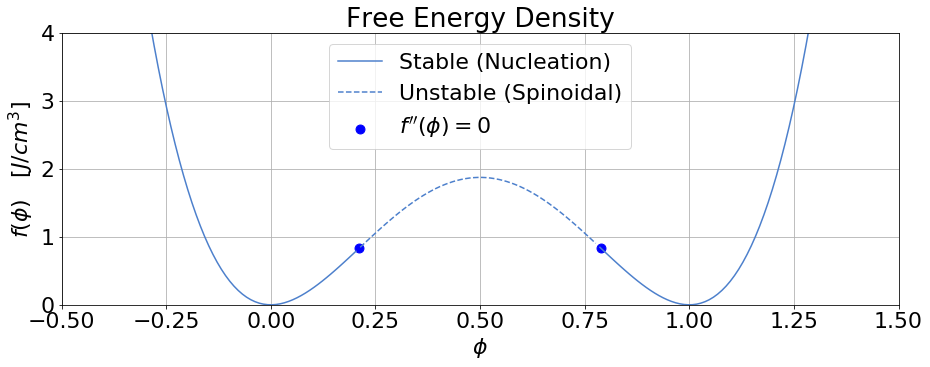

In [597]:
x = np.linspace(-0.5, 1.5, 200)
sigma = 0.1
delta = 10e-9
A = 3*sigma/delta
K = 3*sigma*delta
s1 = 0.5*(1+np.sqrt(1/3)); s2= 0.5*(1-np.sqrt(1/3));
fe = lambda p: A*p**2*(1-p)**2*(100)**(-3)
i1 = np.argmin(np.abs(x-s1)); i2 = np.argmin(np.abs(x-s2));

fig = plt.figure(figsize = (15,5))
plt.rcParams.update({'font.size': 22})
plt.scatter([s1,s2],[fe(s1),fe(s2)],s=80,color=[0,0,1],label=r'$f^{\prime\prime}(\phi)=0$');
plt.plot(x[i1:],fe(x[i1:]),color=[0.3,0.5,0.8]); plt.plot(x[:i2],fe(x[:i2]),color=[0.3,0.5,0.8],label='Stable (Nucleation)')
plt.plot(x[i2:i1],fe(x[i2:i1]),'k--',color=[0.3,0.5,0.8],label='Unstable (Spinoidal)')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$f(\phi)\quad [J/cm^3]$')
plt.grid(True)
plt.title('Free Energy Density')
plt.legend(loc=9)
plt.xlim([-0.5,1.5])
plt.ylim([0,4]);

In [6]:
# 2D Allen-Cahn Equation

# Material parameters
delta = 10e-9;              # Interface width  [m]
sigma = 0.1;                # Interfacial energy [J/m^2]
A = 3*sigma/delta;          # Free energy well height [J/m^3]
K = 3*sigma*delta;          # Gradient energy coefficient [J/m]
M = 1/A;                    # Mobility [J/m.s]

# Simulation parameters
h = 4*delta/10;             # Grid resolution
n = 400;                    # Number of grid points per axis
L = (n)*h;                  # Box length
x = np.arange(0,L,h)        # Domain vector
X = 1e9*x    
dt = 1e-2                   # Time step [s]
nsteps = 1e4;               # Number of steps
t = np.arange(0,nsteps-1,1) # Time vector 
t = t*dt
res = 1000                  # Record results
nrecord = np.int(nsteps/res)

# Laplacian operator and free energy functions
def laplace2D(phi,h):
    return (np.roll(phi,1,axis=1)+np.roll(phi,-1,axis=1)+np.roll(phi,1,axis=0)+np.roll(phi,-1,axis=0) - 4*phi)/h**2  
def dF(phi):
    return A*(2*phi - 6*phi**2 + 4*phi**3)
    
# Initialize order parameter and initial condition
phi = np.zeros([n,n])
#phi[:,0:np.int_(np.floor(n/2))] = 1
for i in range(n):
    for j in range(n):
        phi[i,j] = 0.5 + 0.01*(-1 + 2*random.random())
        #phi[i,j] = 0.1 + 2*(-1 + 2*random.random())
PHI = list([nrecord])
PHI[0] = phi

# Forward Euler time integration of Allen-Cahn equation
for k in range(1,np.int_(nsteps)):
    phi = phi - dt*M*(dF(phi)-2*K*laplace2D(phi,h));
    if np.mod(k,res)==0:
        PHI.append(phi)
        

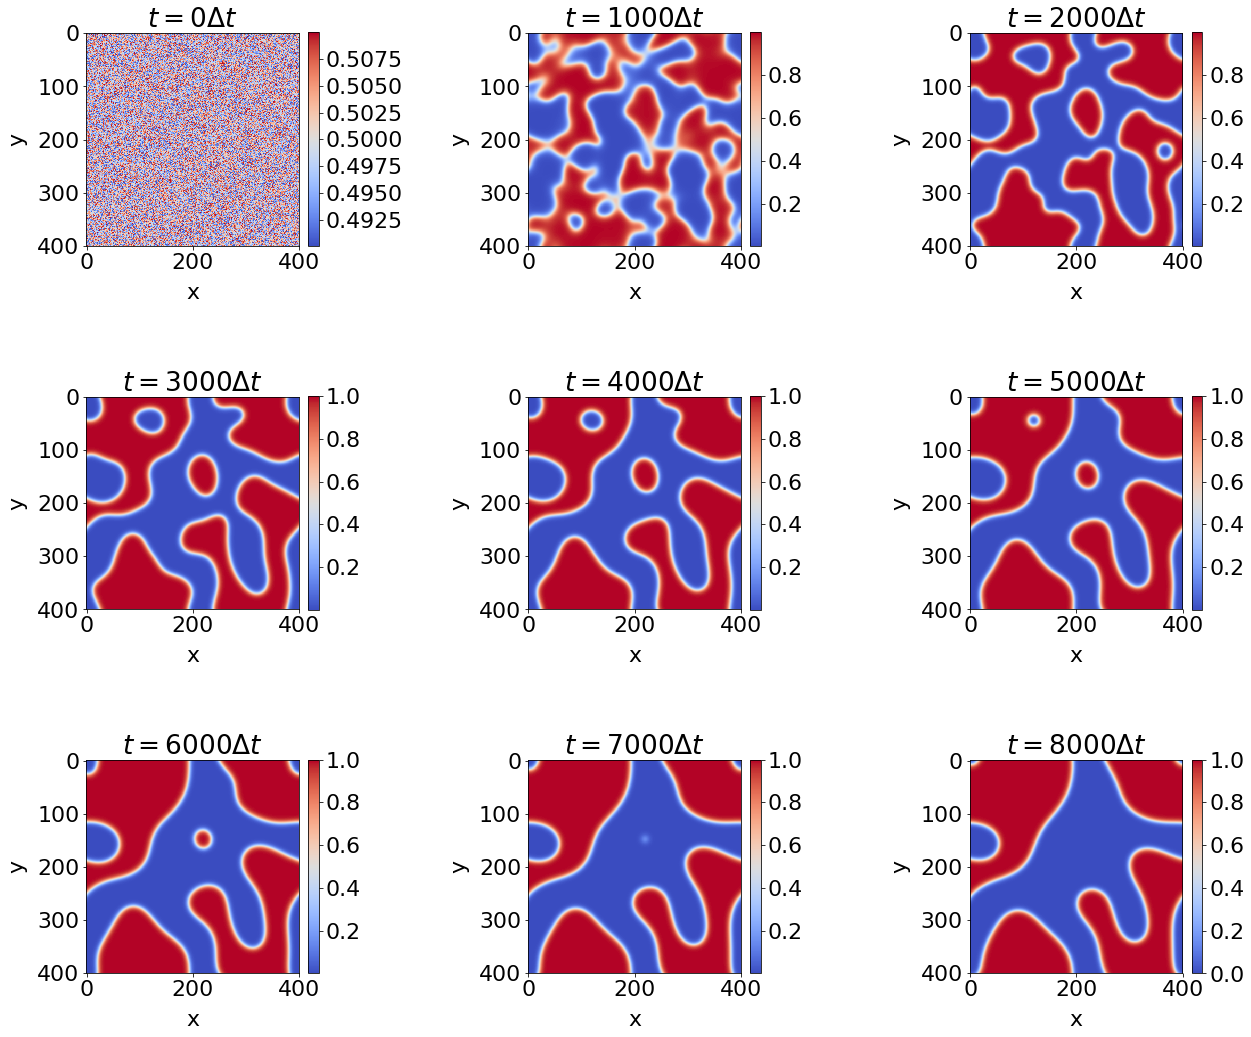

In [92]:
fig = plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(3,3)
gs.update(hspace=0.01,wspace=0.9)
ind = np.arange(0,9)
for i in range(len(ind)):
    ax1 = plt.subplot(gs[i]);
    im1 = ax1.imshow(PHI[ind[i]],cmap='coolwarm')
    plt.colorbar(im1,fraction=0.046, pad=0.04)
    ax1.set_xlabel('x',labelpad=10)
    ax1.set_ylabel('y',labelpad=10)
    ax1.set_title(r'$t = %d \Delta t$' %(res*i))

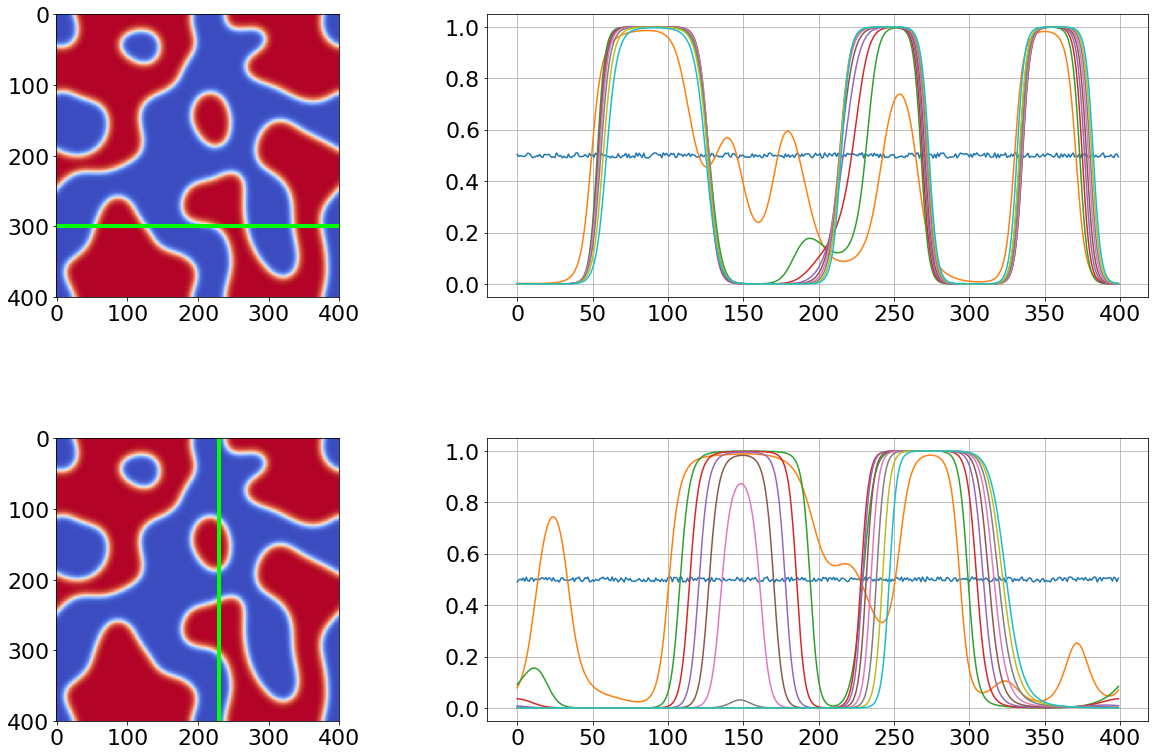

In [130]:
locy = 300;
locx = 230;

fig = plt.figure(figsize = (20,13))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(2,2,width_ratios=[1,2],height_ratios=[1,1])
gs.update(hspace=0.50,wspace=0.25)
ax1 = plt.subplot(gs[0]);   ax2 = plt.subplot(gs[1]);  ax3 = plt.subplot(gs[2]); ax4 = plt.subplot(gs[3]);
ax1.imshow(PHI[3],cmap='coolwarm');
ax1.plot(np.arange(0,len(x)),locy*np.ones(len(x)),'k-',linewidth=4,color=[0,1,0]);
ax3.imshow(PHI[3],cmap='coolwarm');
ax3.plot(locx*np.ones(len(x)),np.arange(0,len(x)),'k-',linewidth=4,color=[0,1,0]);
ypl = []
xpl = []
for i in range(nrecord):
    ypl.append(PHI[i][locy,:])
    xpl.append(PHI[i][:,locx])
    ax2.plot(np.arange(0,len(x)),ypl[i])
    ax4.plot(np.arange(0,len(x)),xpl[i])
ax2.grid(True)
ax2.set_xlabel('x')
ax2.set_ylabel(r'$\phi(x,$y=%d$)$' %(locy));
ax4.grid(True)
ax4.set_xlabel('y')
ax4.set_ylabel(r'$\phi($x=%d,$y)$' %(locx));

In [15]:
# 2D Cahn-Hilliard Equation

# Material parameters
delta = 10e-9;              # Interface width  [m]
sigma = 0.1;                # Interfacial energy [J/m^2]
A = 3*sigma/delta;          # Free energy well height [J/m^3]
K = 3*sigma*delta;          # Gradient energy coefficient [J/m]
M = 1/(A);                    # Mobility [J/m.s]

# Laplacian operator and free energy functions
def laplace2D(phi,h):
    return (np.roll(phi,1,axis=1)+np.roll(phi,-1,axis=1)+np.roll(phi,1,axis=0)+np.roll(phi,-1,axis=0) - 4*phi)/h**2  
def dF(phi):
    return A*(2*phi - 6*phi**2 + 4*phi**3)
def forward_euler_integrate(phi,nsteps,res):
    PHI = []
    PHI.append(phi)
    t = np.arange(0,nsteps-1,1) # Time vector 
    t = t*dt
    # Forward Euler time integration of Cahn-Hilliard equation
    for k in range(1,np.int_(nsteps)+1):
        phi = phi + dt*M*laplace2D(dF(phi)-2*K*laplace2D(phi,h),h);
        if np.mod(k,res)==0:
            PHI.append(phi)
    return PHI

In [51]:
# Simulation parameters
h = 4*delta/6;              # Grid resolution
n = 400;                    # Number of grid points per axis
L = (n)*h;                  # Box length
x = np.arange(0,L,h)        # Domain vector
X = 1e9*x    
dt = 1e-19                  # Time step [s]

# Spinoidal decomposition initial condition
phi = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        phi[i,j] = 0.5 + 0.01*(-1 + 2*random.random())  
        
nsteps = 2e6;               # Number of steps
res = 50000                 # Record every res steps
nrecord = np.int(nsteps/res)
PHI = forward_euler_integrate(phi,nsteps,res)

Text(0.5,0.9,'Cahn-Hilliard Microstructural Evolution')

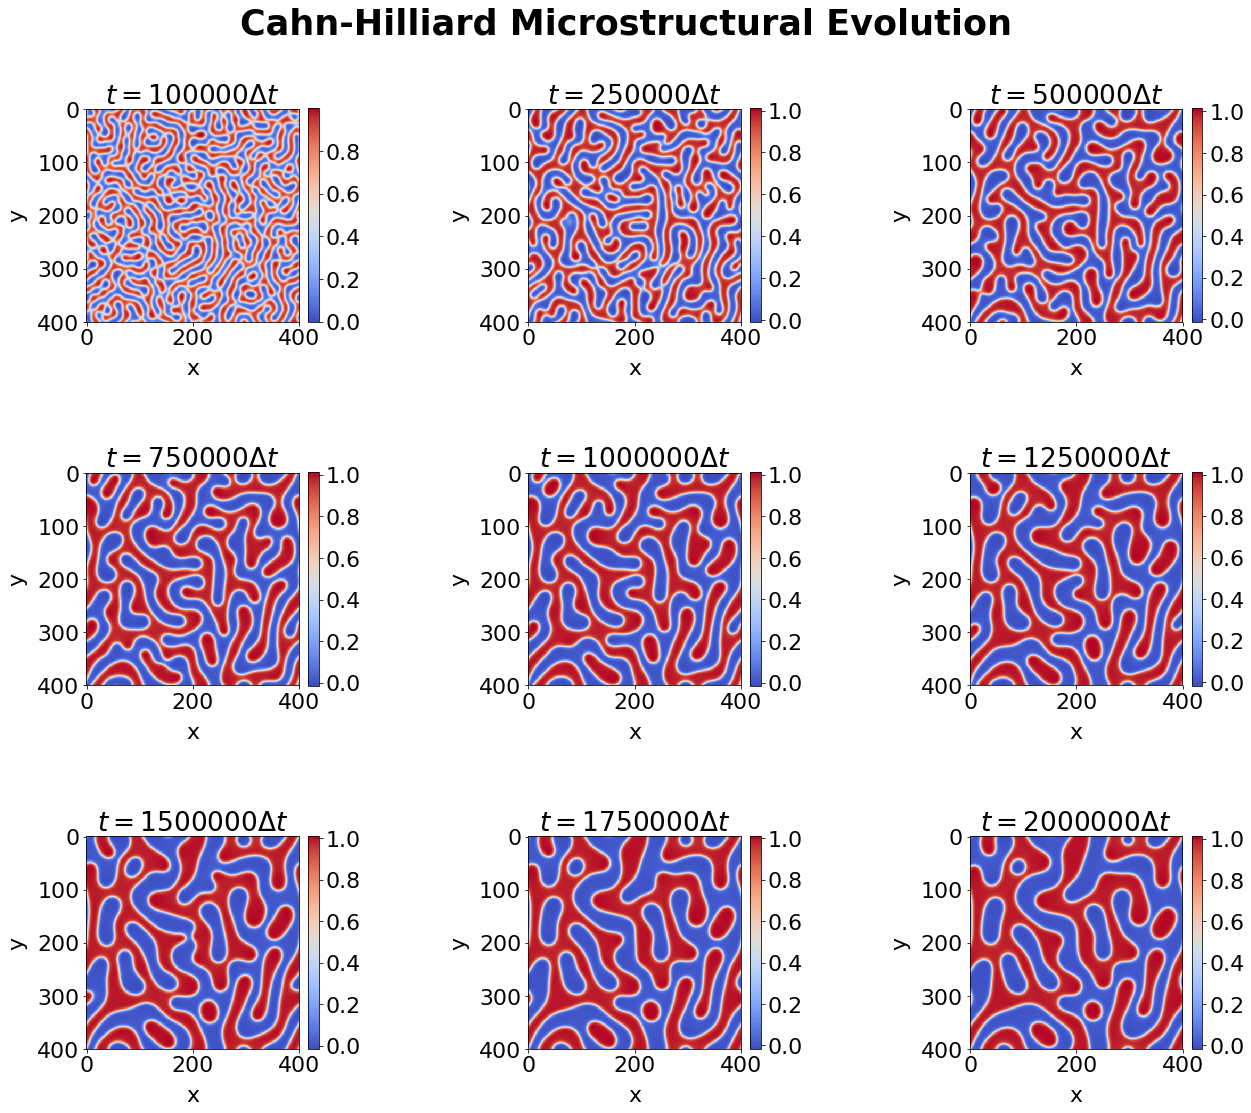

In [121]:
fig = plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(3,3)
gs.update(hspace=0.01,wspace=0.9)
ind = np.array([2,5,10,15,20,25,30,35,40])
for i in range(len(ind)):
    ax1 = plt.subplot(gs[i]);
    im1 = ax1.imshow(PHI[ind[i]],cmap='coolwarm')
    plt.colorbar(im1,fraction=0.046, pad=0.04)
    ax1.set_xlabel('x',labelpad=10)
    ax1.set_ylabel('y',labelpad=10)
    ax1.set_title(r'$t = %d \Delta t$' %(res*ind[i]))
plt.suptitle('Cahn-Hilliard Microstructural Evolution',x=0.5,y=0.9,fontweight='bold',fontsize=35)

Text(0.63,0.98,'Cahn-Hilliard Dendrite Coarsening')

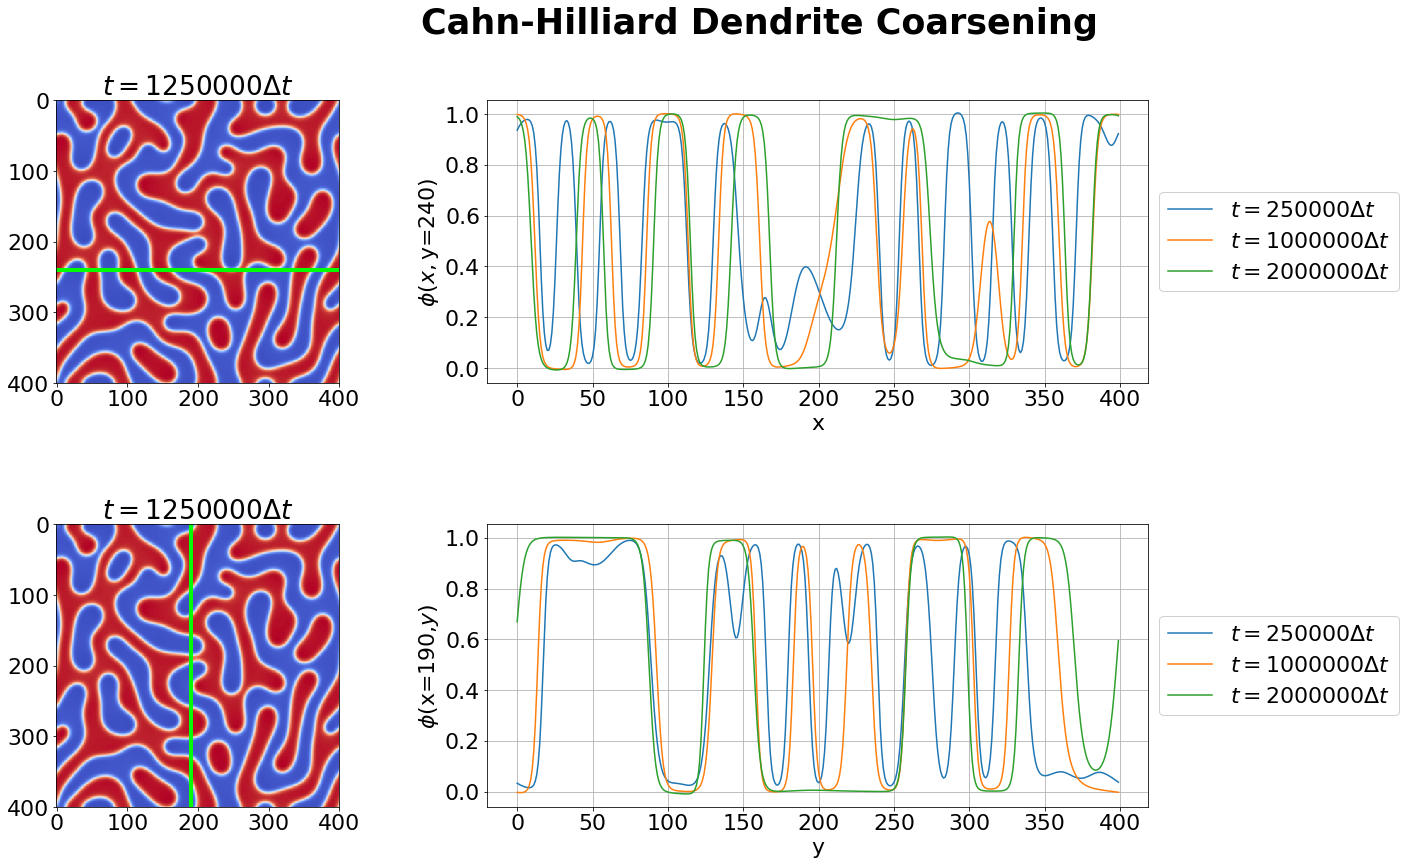

In [126]:
locy = 240;
locx = 190;

fig = plt.figure(figsize = (20,13))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(2,2,width_ratios=[1,2],height_ratios=[1,1])
gs.update(hspace=0.50,wspace=0.25)
ax1 = plt.subplot(gs[0]);   ax2 = plt.subplot(gs[1]);  ax3 = plt.subplot(gs[2]); ax4 = plt.subplot(gs[3]);
ax1.imshow(PHI[25],cmap='coolwarm'); ax1.set_title(r'$t = 1250000\Delta t$');
ax1.plot(np.arange(0,len(x)),locy*np.ones(len(x)),'k-',linewidth=4,color=[0,1,0]);
ax3.imshow(PHI[25],cmap='coolwarm'); ax3.set_title(r'$t = 1250000\Delta t$');
ax3.plot(locx*np.ones(len(x)),np.arange(0,len(x)),'k-',linewidth=4,color=[0,1,0]);
ypl = []
xpl = []

ind = np.array([5,20,40])
labels = [r'$t = 250000\Delta t$',r'$t = 1000000 \Delta t$',r'$t = 2000000 \Delta t$']
for i in range(len(ind)):
    ypl.append(PHI[ind[i]][locy,:])
    xpl.append(PHI[ind[i]][:,locx])
    ax2.plot(np.arange(0,len(x)),ypl[i],label=labels[i])
    ax4.plot(np.arange(0,len(x)),xpl[i],label=labels[i])
ax2.grid(True)
ax2.set_xlabel('x')
ax2.set_ylabel(r'$\phi(x,$y=%d$)$' %(locy));
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),framealpha=0.9)
ax4.grid(True)
ax4.set_xlabel('y')
ax4.set_ylabel(r'$\phi($x=%d,$y)$' %(locx));
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5),framealpha=0.9)
plt.suptitle('Cahn-Hilliard Dendrite Coarsening',x=0.63,fontweight='bold',fontsize=35)


In [125]:
25*res

1250000

In [18]:
# Simulation parameters
h = 4*delta/6;              # Grid resolution
n = 200;                    # Number of grid points per axis
L = (n)*h;                  # Box length
x = np.arange(0,L,h)        # Domain vector
X = 1e9*x    
dt = 1e-19                  # Time step [s]

# Nucleation initial condition
phi = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        phi[i,j] =  0.1 + 3*(-1 + 2*random.random())
nsteps = 1e6
res = 25000
PHI = forward_euler_integrate(phi,nsteps,res)

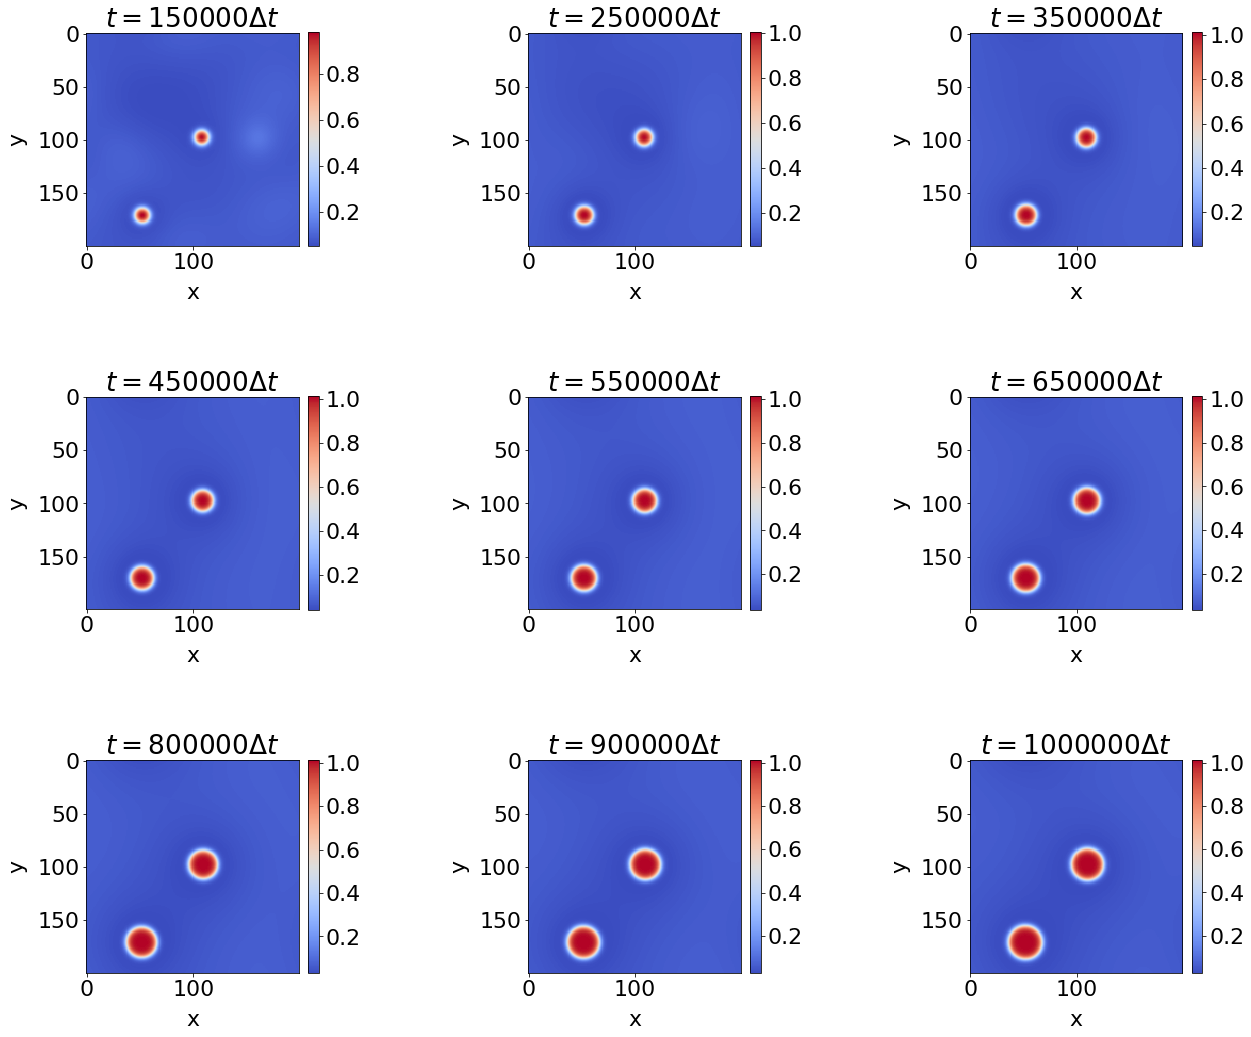

In [23]:
fig = plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(3,3)
gs.update(hspace=0.01,wspace=0.9)
ind = np.array([6,10,14,18,22,26,32,36,40])
for i in range(len(ind)):
    ax1 = plt.subplot(gs[i]);
    im1 = ax1.imshow(PHI[ind[i]],cmap='coolwarm')
    plt.colorbar(im1,fraction=0.046, pad=0.04)
    ax1.set_xlabel('x',labelpad=10)
    ax1.set_ylabel('y',labelpad=10)
    ax1.set_title(r'$t = %d \Delta t$' %(res*ind[i]))

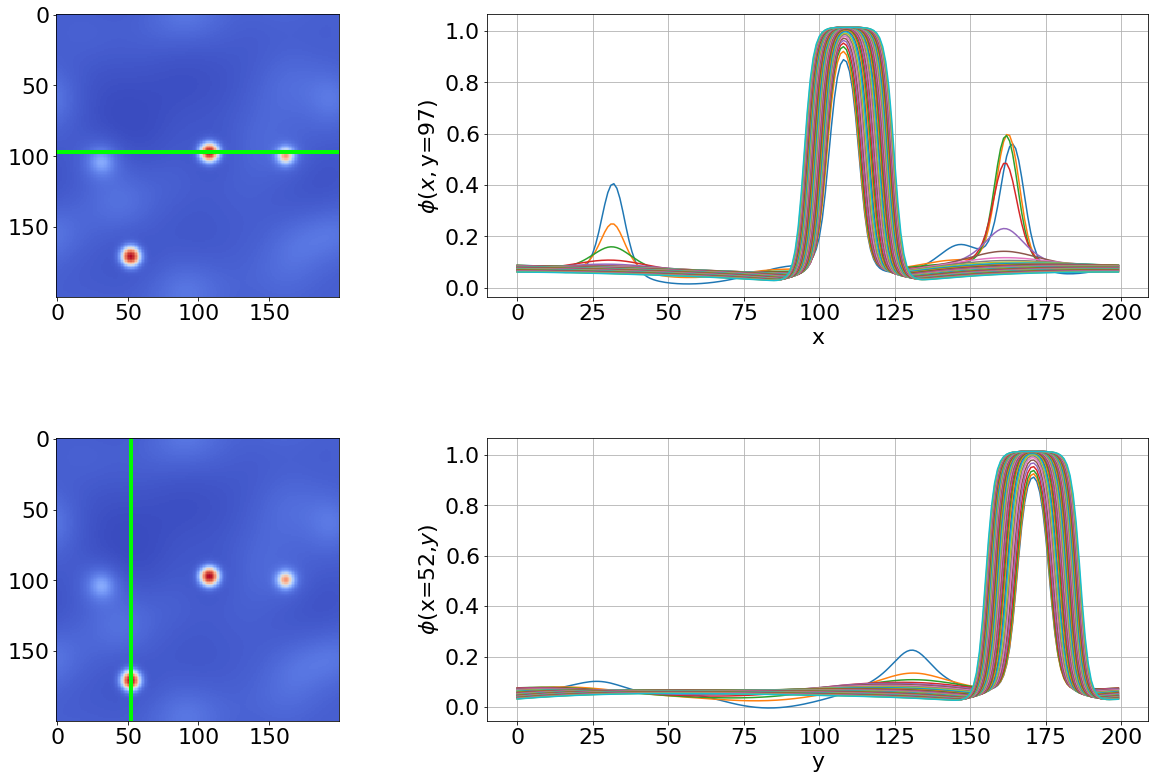

In [38]:
locy = 97;
locx = 52;

fig = plt.figure(figsize = (20,13))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(2,2,width_ratios=[1,2],height_ratios=[1,1])
gs.update(hspace=0.50,wspace=0.25)
ax1 = plt.subplot(gs[0]);   ax2 = plt.subplot(gs[1]);  ax3 = plt.subplot(gs[2]); ax4 = plt.subplot(gs[3]);
ax1.imshow(PHI[3],cmap='coolwarm');
ax1.plot(np.arange(0,len(x)),locy*np.ones(len(x)),'k-',linewidth=4,color=[0,1,0]);
ax3.imshow(PHI[3],cmap='coolwarm');
ax3.plot(locx*np.ones(len(x)),np.arange(0,len(x)),'k-',linewidth=4,color=[0,1,0]);
ypl = []
xpl = []
ct = 0
for i in range(1,int(np.floor(nsteps/res))+1):
    ypl.append(PHI[i][locy,:])
    xpl.append(PHI[i][:,locx])
    ax2.plot(np.arange(0,len(x)),ypl[ct])
    ax4.plot(np.arange(0,len(x)),xpl[ct])
    ct += 1
ax2.grid(True)
ax2.set_xlabel('x')
ax2.set_ylabel(r'$\phi(x,$y=%d$)$' %(locy));
ax4.grid(True)
ax4.set_xlabel('y')
ax4.set_ylabel(r'$\phi($x=%d,$y)$' %(locx));

In [48]:
roi_x1 = np.arange(100,120)
roi_y1 = np.arange(80,110)
roi_x2 = np.arange(40,60)
roi_y2 = np.arange(160,190)

fig = plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(3,3)
gs.update(hspace=0.01,wspace=0.9)
ind = np.arange(0,int(np.floor(nsteps/res))+1)
vol1 = np.zeros(len(ind))
vol2 = np.zeros(len(ind))
for i in range(len(ind)):
    #ax1 = plt.subplot(gs[i]);
    temp1 = np.zeros((len(roi_y1),len(roi_x1)))
    for a in range(len(roi_y1)):
        for b in range(len(roi_x1)):
            temp1[a,b] = PHI[ind[i]][roi_y1[a],roi_x1[b]]
    vol1[i] = np.sum(np.sum(temp1))
    temp2 = np.zeros((len(roi_y2),len(roi_x2)))
    for a in range(len(roi_y2)):
        for b in range(len(roi_x2)):
            temp2[a,b] = PHI[ind[i]][roi_y2[a],roi_x2[b]]
    vol2[i] = np.sum(np.sum(temp2))
    #im1 = ax1.imshow(temp,cmap='jet')
    #plt.colorbar(im1,fraction=0.046, pad=0.04)
    #ax1.set_xlabel('x',labelpad=10)
    #ax1.set_ylabel('y',labelpad=10)
    #ax1.set_title(r'$t = %d \Delta t$' %(res*ind[i]))

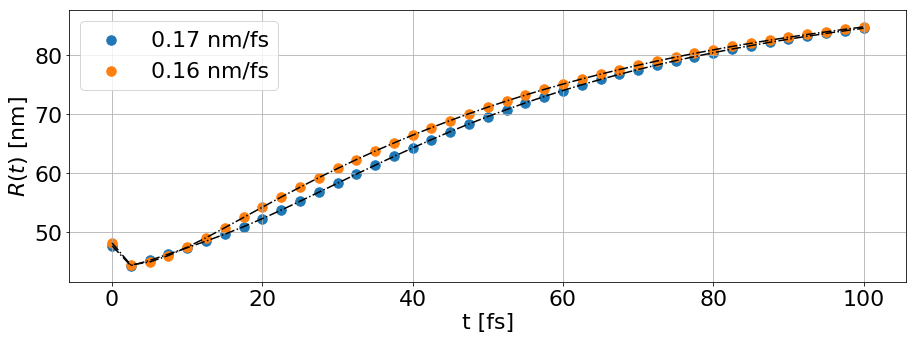

In [49]:
n1 = h*1e9
n2 = 1e15
nrecord = int(np.floor(nsteps/res))+1
Deff = M*(1/(2*A))*(1e9)**2/(1e15) #[nm^2/fs]
tax = np.arange(0,nrecord)*res*dt*n2;
tax2 = np.linspace(np.min(tax),np.max(tax),100)
R1 = np.sqrt(vol1/np.pi)*n1; R2 = np.sqrt(vol2/np.pi)*n1;
dR1dt = (R1[-1] - R1[-2])/(res*dt*n2); dR2dt = (R2[-1]-R2[-2])/(res*dt*n2);

fig = plt.figure(figsize = (15,5))
plt.rcParams.update({'font.size': 22})
plt.scatter(tax,R1,s=90,label='%4.2f nm/fs' %(dR1dt))
plt.scatter(tax,R2,s=90,label='%4.2f nm/fs' %(dR2dt))
#plt.plot(tax2,(tax2-5)**(1/2)+40)
plt.plot(np.arange(0,nrecord)*res*dt*n2,R1,'k-.')
plt.plot(np.arange(0,nrecord)*res*dt*n2,R2,'k-.')
plt.grid(True)
plt.xlabel(r't [fs]')
plt.ylabel(r'$R(t)$ [nm]')
plt.legend(loc=2)

## Multiple Order Parameters: Grain-Growth Simulation

$$f(\pmb{\phi}) = \dfrac{1}{4} - \dfrac{1}{2}\sum_{i=1}^N\phi_i^2 + \dfrac{1}{4}\sum_{i=1}^N \phi_i^4 + \dfrac{3}{4}\sum_{i=1}^N \sum_{\substack{j = 1 \\ j\neq i} }^N \phi_i^2 \phi_j^2$$

Examining the cross term for a few cases:

$N = 2:$

$\frac{3}{4}(\phi_1^2\phi_2^2 + \phi_2^2\phi_1^2) = \frac{3}{2}\phi_1^2\phi_2^2 \Rightarrow \partial_{\phi_1}(\cdot) = 3\phi_1\phi_2^2$

$N = 3:$

$\frac{3}{4}(\phi_1^2\phi_2^2 + \phi_2^2\phi_1^2 + \phi_1^2\phi_3^2 + \phi_3^2\phi_1^2 + \phi_2^2\phi_3^2 + \phi_3^2\phi_2^2) = \frac{3}{2}(\phi_1^2\phi_2^2 + \phi_1^2\phi_3^2 + \phi_2^2\phi_3^2)\Rightarrow \partial_{\phi_1}(\cdot) = 3\phi_1(\phi_2^2 + \phi_3^2)$

In general, we can work out the expression for the gradient:
$$f(\pmb{\phi}) = \dfrac{1}{4} - \dfrac{1}{2}\sum_{i=1}^N\phi_i^2 + \dfrac{1}{4}\sum_{i=1}^N \phi_i^4 + \dfrac{3}{2}\sum_{i=1}^N \sum_{\substack{j \neq i}}^N \phi_i^2 \phi_j^2$$

$$\dfrac{\partial f(\pmb{\phi})}{\partial \phi_i} = -\phi_i + \phi_i^3 + 3\phi_i\left(\sum_{\substack{j \neq i}}^N \phi_j^2 \right) = -\phi_i + \phi_i^3 + 3\phi_i\left(\sum_{j=1}^N \phi_j^2 - \phi_i^2\right)$$

$$\dfrac{\partial f(\pmb{\phi})}{\partial \phi_i} = -\phi_i - 2\phi_i^3 + 3\phi_i\sum_{j=1}^N \phi_j^2$$

In [450]:
# Multiorder Paramter Simulation - Grain Growth

def laplace2D(phi,h):
    return (np.roll(phi,1,axis=1)+np.roll(phi,-1,axis=1)+np.roll(phi,1,axis=0)+np.roll(phi,-1,axis=0) - 4*phi)/h**2

def dF(phi):
    temp = np.sum(phi**2,2)[:,:,np.newaxis]
    return -phi-2*phi**3+3*phi*np.tile(temp,(1,1,ngrains))

def forward_euler_integrate(phi,nsteps,res,ngrains):
    PHI = []
    PHI.append(phi)
    t = np.arange(0,nsteps-1,1)
    t = t*dt
    for k in range(1,np.int_(nsteps)+1):
        #temp = np.sum(phi**2,2)[:,:,np.newaxis]
        #phi = phi - dt*M*(-phi-2*phi**3+3*phi*np.tile(temp,(1,1,ngrains))-2*K*laplace2D(phi,h));
        phi = phi - dt*M*(dF(phi)-2*K*laplace2D(phi,h));
        if np.mod(k,res) == 0:
            PHI.append(phi)
    return PHI

def grain_boundary(PHI):
    gbounds = []
    for k in range(len(PHI)):
        Temp = np.sum(PHI[k]**2*(1-PHI[k])**2,2)
        gbounds.append(Temp)
    return gbounds

def grain_label(PHI):
    grains = []
    n = len(PHI[0])
    for i in range(len(PHI)):
        dom = np.zeros((n,n))
        for a in range(n):
            for b in range(n):
                dom[a,b] = np.argmax(np.squeeze(PHI[i][a,b,:]))
        grains.append(dom)
    return grains

In [515]:
K = 1;         # gradient energy coefficient
M = 1;         # mobility
ngrains = 2;   # Number of grains

# Simulation parameters
h = 1;                      # Grid resolution
n = 100;                    # Number of grid points per axis
L = (n)*h;                  # Box length
x = np.arange(0,L,h)        # Domain vector
xx,yy = np.meshgrid(x,x)    # Domain mesh
dt = 0.01                   # Time step [s]
res = 100
nsteps = 2000

# Initial condition
phi = np.zeros((n,n,2))
phi1 = np.zeros((n,n));  
phi1[:,0:int(np.floor(n/2))] = 1;
phi2 = np.zeros((n,n));  
phi2[:,int(np.floor(n/2)+1):] = 1;
phi[:,:,0] = phi1;
phi[:,:,1] = phi2;

PHI = forward_euler_integrate(phi,nsteps,res,ngrains)

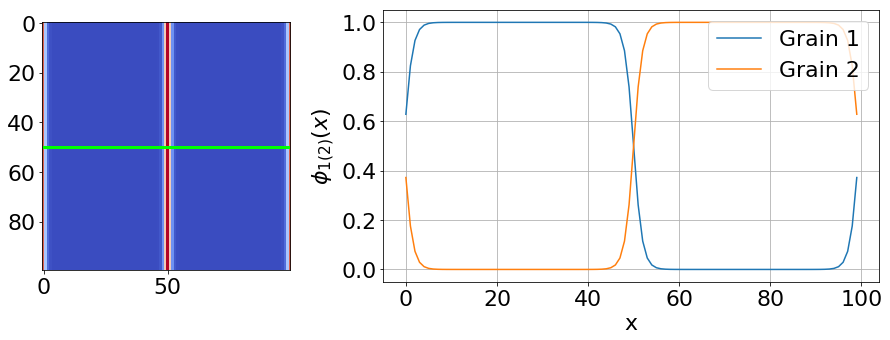

In [533]:
gbounds = grain_boundary(PHI)
grains = grain_label(PHI)

fig = plt.figure(figsize = (15,5))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(1,2,width_ratios=[1,2],height_ratios=[1])
gs.update(hspace=0.50,wspace=0.25)
ax1 = plt.subplot(gs[0]);   ax2 = plt.subplot(gs[1]);  
ax1.imshow(gbounds[-1],cmap='coolwarm');
ax1.plot(np.arange(n),np.floor(n/2)*np.ones(n),linewidth=3,color=[0,1,0])
y1 = PHI[-1][int(np.floor(n/2)),:,0]; y2 = PHI[-1][int(np.floor(n/2)),:,1];
ax2.plot(x,y1,label='Grain 1')
ax2.plot(x,y2,label='Grain 2')
ax2.set_xlabel('x')
ax2.set_ylabel(r'$\phi_{1(2)}(x)$')
ax2.legend(loc=1)
plt.grid(True)

In [445]:
K = 1;         # gradient energy coefficient
M = 1;         # mobility
ngrains = 20;   # Number of grains

# Simulation parameters
h = 1;                      # Grid resolution
n = 400;                    # Number of grid points per axis
L = (n)*h;                  # Box length
x = np.arange(0,L,h)        # Domain vector
xx,yy = np.meshgrid(x,x)    # Domain mesh
dt = 0.01                   # Time step [s]
res = 1000
nsteps = 30000

# Initial condition
phi = np.zeros((n,n,ngrains)); 
beta = 0.01;
for i in range(ngrains):
    phi[:,:,i] = beta*(np.random.rand(n,n))

PHI = forward_euler_integrate(phi,nsteps,res,ngrains)

In [451]:
gbounds = grain_boundary(PHI)
grains = grain_label(PHI)

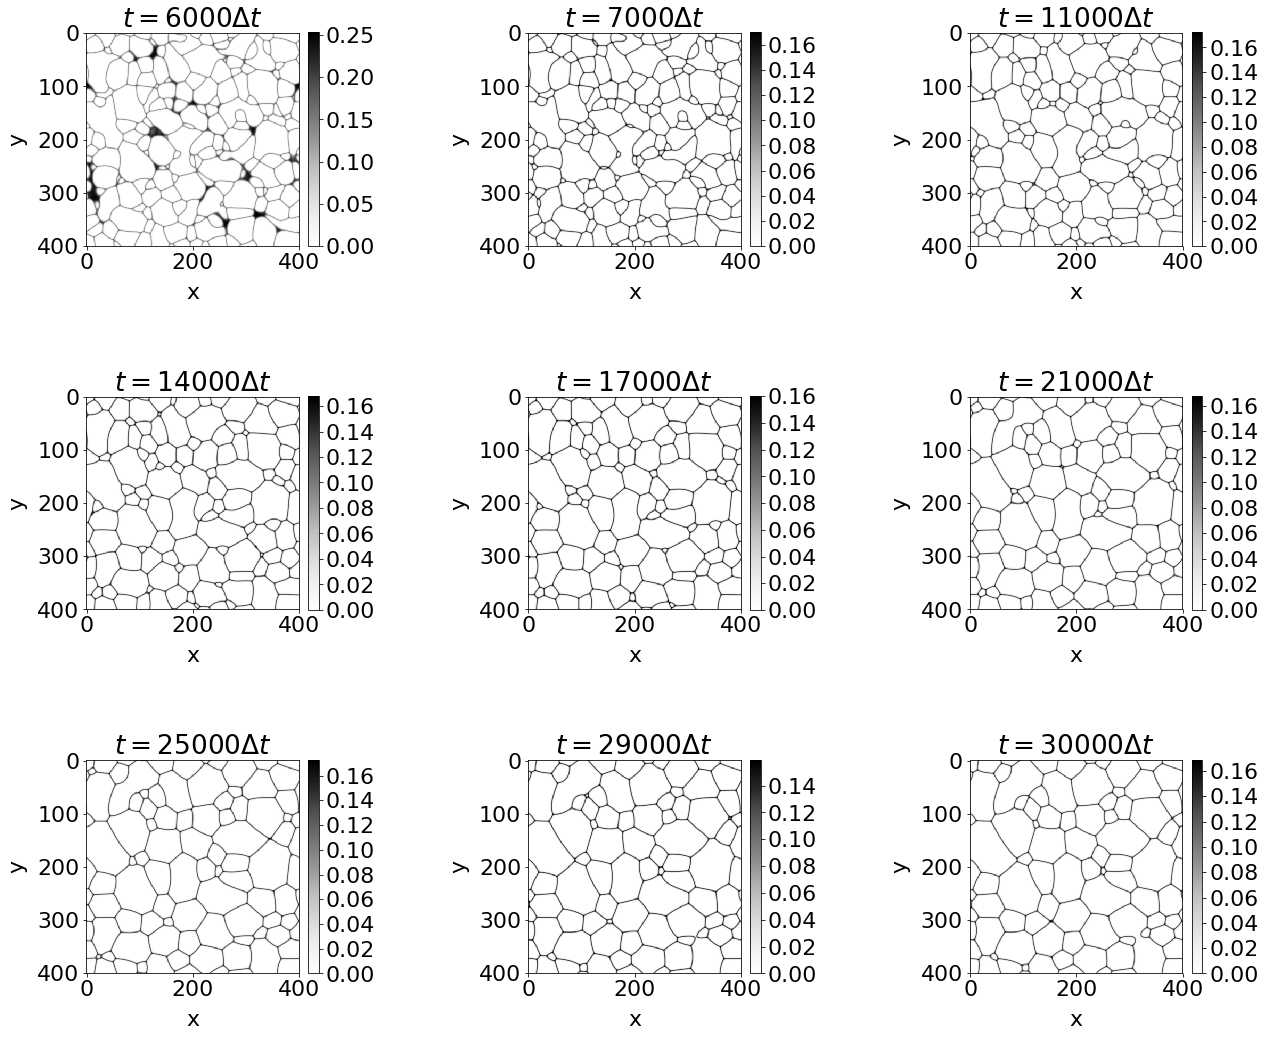

In [464]:
fig = plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(3,3)
gs.update(hspace=0.01,wspace=0.9)

ind = np.arange(22,31)
ind = [6, 7, 11, 14, 17, 21, 25, 29, 30]

for i in range(len(ind)):
    ax1 = plt.subplot(gs[i]);
    im1 = ax1.imshow(gbounds[ind[i]],cmap='Greys')
    plt.colorbar(im1,fraction=0.046, pad=0.04)
    ax1.set_xlabel('x',labelpad=10)
    ax1.set_ylabel('y',labelpad=10)
    ax1.set_title(r'$t = %d \Delta t$' %(res*ind[i]))

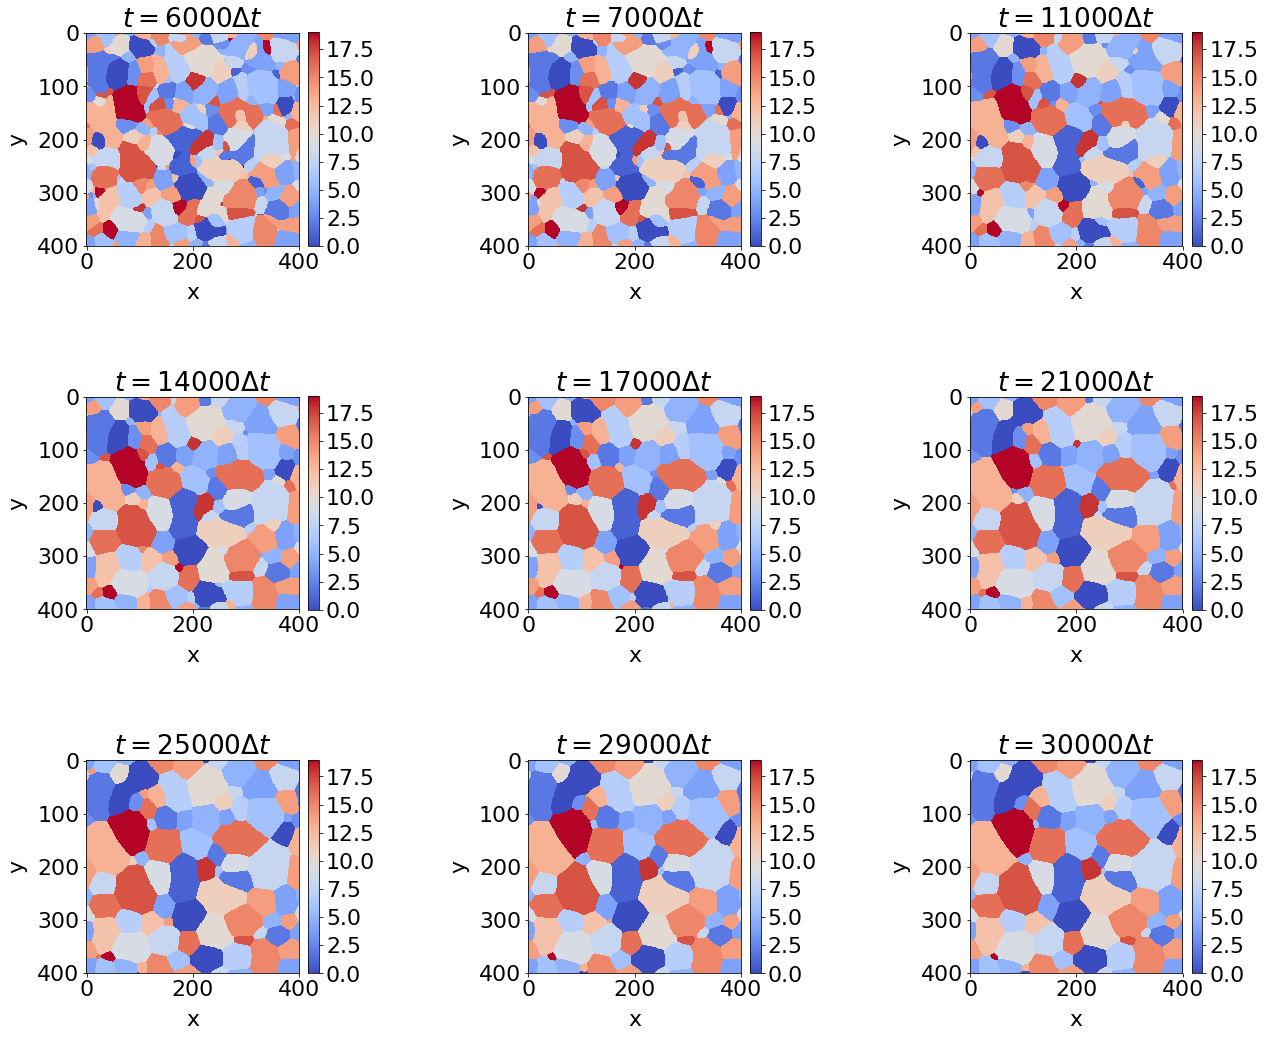

In [465]:
fig = plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 22})
gs = gridspec.GridSpec(3,3)
gs.update(hspace=0.01,wspace=0.9)

ind = [6, 7, 11, 14, 17, 21, 25, 29, 30]

for i in range(len(ind)):
    ax1 = plt.subplot(gs[i]);
    im1 = ax1.imshow(grains[ind[i]],cmap='coolwarm')
    plt.colorbar(im1,fraction=0.046, pad=0.04)
    ax1.set_xlabel('x',labelpad=10)
    ax1.set_ylabel('y',labelpad=10)
    ax1.set_title(r'$t = %d \Delta t$' %(res*ind[i]))